# 第11章 时间序列

## 日期和时间数据的类型及工具

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2019, 3, 11, 16, 13, 27, 228862)

In [4]:
now.year,now.month,now.day

(2019, 3, 11)

In [5]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011,1,7)

In [11]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

- 字符串与datetime互相转换

In [13]:
stamp = datetime(2011,1,3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011','8/6/2011']

In [21]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [26]:
from dateutil.parser import parse

In [27]:
parse('2011-01-01')

datetime.datetime(2011, 1, 1, 0, 0)

In [28]:
parse('Jan 311997 10:45 PM')

datetime.datetime(2019, 1, 11, 22, 45)

In [29]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [32]:
import pandas as pd
import numpy as np

In [30]:
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']

In [33]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [35]:
idx = pd.to_datetime(datestrs+[None])

In [36]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [37]:
idx[2]

NaT

In [39]:
pd.isnull(idx)

array([False, False,  True])

## 时间序列的基础

In [41]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),
        datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

In [42]:
ts = pd.Series(np.random.randn(6),index=dates)

In [43]:
ts

2011-01-02   -0.323552
2011-01-05    0.371645
2011-01-07    0.683331
2011-01-08    1.146729
2011-01-10    0.267299
2011-01-12    0.795181
dtype: float64

In [44]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [46]:
ts + ts[::2]

2011-01-02   -0.647103
2011-01-05         NaN
2011-01-07    1.366663
2011-01-08         NaN
2011-01-10    0.534599
2011-01-12         NaN
dtype: float64

In [47]:
ts.index.dtype

dtype('<M8[ns]')

In [49]:
stamp = ts.index[0]

In [50]:
stamp

Timestamp('2011-01-02 00:00:00')

- 索引、选择、子集

In [51]:
stamp = ts.index[2]

In [52]:
ts[stamp]

0.6833313666580499

In [53]:
ts['1/10/2011']

0.2672993165806981

In [54]:
ts['20110110']

0.2672993165806981

In [55]:
longer_ts =pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))

In [56]:
longer_ts

2000-01-01   -0.950590
2000-01-02    1.468743
2000-01-03    0.168418
2000-01-04    1.344932
2000-01-05   -0.150552
2000-01-06   -1.075113
2000-01-07    0.109630
2000-01-08   -0.356626
2000-01-09    1.633231
2000-01-10   -0.422641
2000-01-11    0.543067
2000-01-12   -0.234134
2000-01-13   -1.133366
2000-01-14   -0.208102
2000-01-15    1.029776
2000-01-16   -0.545057
2000-01-17   -0.077377
2000-01-18   -0.166180
2000-01-19    0.497095
2000-01-20    1.441589
2000-01-21   -1.367104
2000-01-22   -0.689433
2000-01-23    0.322449
2000-01-24    0.372600
2000-01-25   -0.501764
2000-01-26   -0.012399
2000-01-27    0.581672
2000-01-28    1.530412
2000-01-29    0.248054
2000-01-30   -1.179953
                ...   
2002-08-28    1.152959
2002-08-29   -0.497332
2002-08-30   -0.071067
2002-08-31    0.078208
2002-09-01   -2.257277
2002-09-02    1.004262
2002-09-03    0.948276
2002-09-04   -0.880945
2002-09-05    0.449578
2002-09-06    0.618256
2002-09-07    1.090390
2002-09-08   -0.246040
2002-09-09 

In [57]:
longer_ts['2001']

2001-01-01   -2.096314
2001-01-02   -0.279594
2001-01-03   -0.137458
2001-01-04   -1.017492
2001-01-05    0.282047
2001-01-06    0.344358
2001-01-07    1.315120
2001-01-08    1.534182
2001-01-09    0.973425
2001-01-10    0.785353
2001-01-11    0.818497
2001-01-12    0.335718
2001-01-13   -1.494491
2001-01-14    0.588930
2001-01-15   -0.577115
2001-01-16    0.269415
2001-01-17   -1.272923
2001-01-18    0.444095
2001-01-19    0.651070
2001-01-20    1.117690
2001-01-21    0.525342
2001-01-22   -0.214330
2001-01-23    0.634276
2001-01-24    1.358211
2001-01-25   -1.244648
2001-01-26   -1.340726
2001-01-27    0.128884
2001-01-28    0.335854
2001-01-29   -0.351172
2001-01-30   -1.532667
                ...   
2001-12-02    0.660139
2001-12-03   -0.107113
2001-12-04   -0.006597
2001-12-05   -0.178622
2001-12-06    0.152248
2001-12-07   -1.065085
2001-12-08   -1.731286
2001-12-09    3.603530
2001-12-10   -0.230699
2001-12-11   -1.550230
2001-12-12   -0.478798
2001-12-13   -1.815849
2001-12-14 

In [59]:
longer_ts['2001-05']

2001-05-01    0.200620
2001-05-02    0.531946
2001-05-03    1.630471
2001-05-04   -0.132724
2001-05-05   -0.646893
2001-05-06    0.757951
2001-05-07    0.031129
2001-05-08    0.760313
2001-05-09   -0.314577
2001-05-10    1.352258
2001-05-11   -0.033057
2001-05-12    0.432127
2001-05-13   -0.075628
2001-05-14    0.505899
2001-05-15    1.665898
2001-05-16   -0.796007
2001-05-17   -0.198332
2001-05-18    0.172071
2001-05-19    0.633339
2001-05-20    0.787531
2001-05-21   -1.253638
2001-05-22    1.008402
2001-05-23    0.331033
2001-05-24    1.298037
2001-05-25    0.672535
2001-05-26    0.038478
2001-05-27   -1.438561
2001-05-28    1.471422
2001-05-29    0.430171
2001-05-30   -0.615078
2001-05-31   -1.253839
Freq: D, dtype: float64

In [62]:
ts[datetime(2011,1,7):]

2011-01-07    0.683331
2011-01-08    1.146729
2011-01-10    0.267299
2011-01-12    0.795181
dtype: float64

In [61]:
ts

2011-01-02   -0.323552
2011-01-05    0.371645
2011-01-07    0.683331
2011-01-08    1.146729
2011-01-10    0.267299
2011-01-12    0.795181
dtype: float64

In [63]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.683331
2011-01-08    1.146729
2011-01-10    0.267299
dtype: float64

In [64]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.323552
2011-01-05    0.371645
2011-01-07    0.683331
2011-01-08    1.146729
dtype: float64

In [65]:
dates= pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [66]:
long_df =pd.DataFrame(np.random.randn(100,4),index=dates,columns = ['colorado','texas','new york','ohio'])

In [67]:
long_df.loc['5-2001']

,colorado,texas,new york,ohio
2001-05-02,-0.589907,-0.165151,-1.109219,0.150814
2001-05-09,0.501827,-1.603229,0.340371,-0.480277
2001-05-16,-0.139948,-0.366003,-1.638389,0.093602
2001-05-23,0.907866,-1.775183,1.020139,-0.111255
2001-05-30,0.422415,0.552199,1.634977,0.912663


- 含有重复索引的时间序列

In [68]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

In [69]:
tup_ts = pd.Series(np.arange(5),index=dates)

In [70]:
tup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [71]:
tup_ts.index.is_unique

False

In [72]:
tup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [73]:
tup_ts['1/3/2000']

4

In [75]:
tup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [76]:
tup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期范围、频率和移位

In [3]:
from datetime import datetime
import pandas as pd
import numpy as np

In [4]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),
        datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6),index=dates)

In [5]:
ts

2011-01-02   -0.216016
2011-01-05   -0.306929
2011-01-07    0.677160
2011-01-08    1.290314
2011-01-10   -1.371900
2011-01-12    1.775150
dtype: float64

In [7]:
resampler = ts.resample('D')

- 生成日期范围

In [8]:
index = pd.date_range('2012-04-01','2012-06-01')

In [9]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [10]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [16]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

- 频率和日期偏置

In [18]:
from pandas.tseries.offsets import Hour,Minute

In [19]:
hour = Hour()

In [20]:
hour

<Hour>

In [21]:
four_hours = Hour(4)

In [22]:
four_hours

<4 * Hours>

In [23]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [24]:
Hour(2)+Minute(30)

<150 * Minutes>

In [25]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [26]:
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

In [27]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

- 移位（前向和后向）日期

In [28]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [29]:
ts

2000-01-31    0.553914
2000-02-29    0.320321
2000-03-31    1.496250
2000-04-30    2.328024
Freq: M, dtype: float64

In [30]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.553914
2000-04-30    0.320321
Freq: M, dtype: float64

In [31]:
ts.shift(-2)

2000-01-31    1.496250
2000-02-29    2.328024
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [32]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -0.421713
2000-03-31    3.671092
2000-04-30    0.555906
Freq: M, dtype: float64

In [33]:
ts.shift(2,freq="M")

2000-03-31    0.553914
2000-04-30    0.320321
2000-05-31    1.496250
2000-06-30    2.328024
Freq: M, dtype: float64

In [34]:
ts.shift(3,freq='D')

2000-02-03    0.553914
2000-03-03    0.320321
2000-04-03    1.496250
2000-05-03    2.328024
dtype: float64

In [35]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00    0.553914
2000-02-29 01:30:00    0.320321
2000-03-31 01:30:00    1.496250
2000-04-30 01:30:00    2.328024
Freq: M, dtype: float64

In [36]:
from pandas.tseries.offsets import Day,MonthEnd

In [37]:
now = datetime(2011,11,17)

In [38]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [39]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [40]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [41]:
offset  = MonthEnd()

In [42]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [43]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [45]:
ts = pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [46]:
ts

2000-01-15   -0.300174
2000-01-19   -0.381186
2000-01-23    0.023195
2000-01-27   -0.466453
2000-01-31    0.834375
2000-02-04   -0.130202
2000-02-08   -0.177788
2000-02-12   -0.968804
2000-02-16   -0.895585
2000-02-20    1.277752
2000-02-24   -0.383479
2000-02-28   -1.799994
2000-03-03    0.900114
2000-03-07    0.422569
2000-03-11   -0.747582
2000-03-15   -0.438858
2000-03-19   -1.356811
2000-03-23   -0.206336
2000-03-27    0.936329
2000-03-31   -0.309562
Freq: 4D, dtype: float64

In [47]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.058049
2000-02-29   -0.439728
2000-03-31   -0.100017
dtype: float64

In [48]:
ts.resample('M').mean()

2000-01-31   -0.058049
2000-02-29   -0.439728
2000-03-31   -0.100017
Freq: M, dtype: float64

## 时区处理

In [49]:
import pytz

In [50]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [54]:
tz = pytz.timezone('America/New_York')

In [55]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

- 时区的本地化和转化

In [56]:
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [57]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [58]:
ts

2012-03-09 09:30:00   -0.014296
2012-03-10 09:30:00   -0.516194
2012-03-11 09:30:00   -0.549166
2012-03-12 09:30:00    1.067962
2012-03-13 09:30:00   -0.414887
2012-03-14 09:30:00   -0.675831
Freq: D, dtype: float64

In [59]:
print(ts.index.tz)

None


In [60]:
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [61]:
ts

2012-03-09 09:30:00   -0.014296
2012-03-10 09:30:00   -0.516194
2012-03-11 09:30:00   -0.549166
2012-03-12 09:30:00    1.067962
2012-03-13 09:30:00   -0.414887
2012-03-14 09:30:00   -0.675831
Freq: D, dtype: float64

In [62]:
ts_utc = ts.tz_localize('UTC')

In [63]:
ts_utc

2012-03-09 09:30:00+00:00   -0.014296
2012-03-10 09:30:00+00:00   -0.516194
2012-03-11 09:30:00+00:00   -0.549166
2012-03-12 09:30:00+00:00    1.067962
2012-03-13 09:30:00+00:00   -0.414887
2012-03-14 09:30:00+00:00   -0.675831
Freq: D, dtype: float64

In [64]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

## 时间区间和区间算术

In [65]:
p = pd.Period(2007,freq='A-DEC')

In [66]:
p

Period('2007', 'A-DEC')

In [67]:
p+5

Period('2012', 'A-DEC')

In [68]:
p-2

Period('2005', 'A-DEC')

In [69]:
pd.Period('2014',freq='A-DEC') - p

7

In [70]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')

In [71]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [72]:
pd.Series(np.random.randn(6),index=rng)

2000-01    2.385573
2000-02   -0.394702
2000-03    0.079935
2000-04   -0.142042
2000-05    0.718831
2000-06    0.089605
Freq: M, dtype: float64

In [73]:
values = ['2001Q1','2002Q2','2003Q1']

In [74]:
index = pd.PeriodIndex(values,freq='Q-DEC')

In [75]:
index

PeriodIndex(['2001Q1', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

- 区间频率转换

In [76]:
p

Period('2007', 'A-DEC')

In [77]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [78]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [79]:
p = pd.Period('2007',freq='A-JUN')

In [80]:
p

Period('2007', 'A-JUN')

In [81]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [82]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [83]:
p = pd.Period('Aug-2007','M')

In [84]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [85]:
rng = pd.period_range('2006','2009',freq='A-DEC')

In [87]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [88]:
ts

2006   -0.030730
2007    0.670613
2008   -1.344953
2009   -0.100625
Freq: A-DEC, dtype: float64

In [89]:
ts.asfreq("M",how='start')

2006-01   -0.030730
2007-01    0.670613
2008-01   -1.344953
2009-01   -0.100625
Freq: M, dtype: float64

In [90]:
ts.asfreq('B',how='end')

2006-12-29   -0.030730
2007-12-31    0.670613
2008-12-31   -1.344953
2009-12-31   -0.100625
Freq: B, dtype: float64

- 季度区间频率

In [92]:
p = pd.Period('2012Q4',freq='Q-JAN')

In [93]:
p

Period('2012Q4', 'Q-JAN')

In [94]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [95]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

## 重新采样与频率转换

In [96]:
rng = pd.date_range('2001-01-01',periods=100,freq='D')

In [98]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [99]:
ts

2001-01-01   -0.874874
2001-01-02   -0.022426
2001-01-03    0.730205
2001-01-04    1.376318
2001-01-05   -0.295081
2001-01-06    1.635490
2001-01-07    0.159633
2001-01-08   -0.031669
2001-01-09   -0.065143
2001-01-10    2.107002
2001-01-11    0.877653
2001-01-12    0.519396
2001-01-13    0.199457
2001-01-14    1.249072
2001-01-15   -2.081146
2001-01-16    0.155754
2001-01-17   -0.255826
2001-01-18    0.334607
2001-01-19   -1.796708
2001-01-20   -1.704966
2001-01-21    0.073478
2001-01-22   -0.341516
2001-01-23    1.052867
2001-01-24    1.564495
2001-01-25    0.908513
2001-01-26   -0.266323
2001-01-27    0.204688
2001-01-28    1.334322
2001-01-29   -2.016198
2001-01-30    0.821103
                ...   
2001-03-12    1.467715
2001-03-13   -0.498387
2001-03-14    0.483333
2001-03-15   -1.721931
2001-03-16    1.699672
2001-03-17    1.134571
2001-03-18   -0.232825
2001-03-19    0.175935
2001-03-20    1.759892
2001-03-21   -0.364867
2001-03-22    2.571336
2001-03-23   -1.950513
2001-03-24 

In [100]:
ts.resample('M').mean()

2001-01-31    0.215881
2001-02-28   -0.097202
2001-03-31   -0.026508
2001-04-30    0.325995
Freq: M, dtype: float64

In [101]:
ts.resample('M',kind='period').mean()

2001-01    0.215881
2001-02   -0.097202
2001-03   -0.026508
2001-04    0.325995
Freq: M, dtype: float64

- 向下采样

In [102]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')

In [103]:
ts = pd.Series(np.arange(12),index=rng)

In [104]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [105]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [106]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [110]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [111]:
# 开端-峰值-谷值-结束（OHLC）重新采样
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


- 向上采样与插值

In [113]:
frame =  pd.DataFrame(np.random.randn(2,4),
                     index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                     columns=['colorado','texas','new york','ohio'])

In [114]:
frame

,colorado,texas,new york,ohio
2000-01-05,0.290914,0.489158,-0.410278,0.229290
2000-01-12,0.549411,1.646014,0.296112,-0.353988


In [115]:
df_daily = frame.resample('D').asfreq()

In [116]:
df_daily

,colorado,texas,new york,ohio
2000-01-05,0.290914,0.489158,-0.410278,0.229290
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.549411,1.646014,0.296112,-0.353988


In [117]:
frame.resample('D').ffill()

,colorado,texas,new york,ohio
2000-01-05,0.290914,0.489158,-0.410278,0.229290
2000-01-06,0.290914,0.489158,-0.410278,0.229290
2000-01-07,0.290914,0.489158,-0.410278,0.229290
2000-01-08,0.290914,0.489158,-0.410278,0.229290
2000-01-09,0.290914,0.489158,-0.410278,0.229290
2000-01-10,0.290914,0.489158,-0.410278,0.229290
2000-01-11,0.290914,0.489158,-0.410278,0.229290
2000-01-12,0.549411,1.646014,0.296112,-0.353988


In [118]:
frame.resample('D').ffill(limit=2)

,colorado,texas,new york,ohio
2000-01-05,0.290914,0.489158,-0.410278,0.229290
2000-01-06,0.290914,0.489158,-0.410278,0.229290
2000-01-07,0.290914,0.489158,-0.410278,0.229290
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.549411,1.646014,0.296112,-0.353988


In [119]:
frame.resample('W-THU').ffill()

,colorado,texas,new york,ohio
2000-01-06,0.290914,0.489158,-0.410278,0.229290
2000-01-13,0.549411,1.646014,0.296112,-0.353988


- 使用区间进行重新采样

In [120]:
frame = pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'),
                    columns=['colorado','texas','new york','ohio'])

In [121]:
frame.head()

,colorado,texas,new york,ohio
2000-01,0.659243,1.183066,0.098354,-1.664640
2000-02,-0.148069,-1.205175,0.532670,-0.685280
2000-03,-1.217377,-1.640572,0.494931,-0.310205
2000-04,1.679769,-0.656112,-0.828765,0.337189
2000-05,-1.512835,-0.011758,-1.141399,0.571469


In [122]:
annual_frame = frame.resample('A-DEC').mean()

In [123]:
annual_frame

,colorado,texas,new york,ohio
2000,-0.024793,-0.460488,0.142554,-0.203986
2001,-0.096569,-0.052153,0.084669,0.108678


In [124]:
annual_frame.resample('Q-DEC').ffill()

,colorado,texas,new york,ohio
2000Q1,-0.024793,-0.460488,0.142554,-0.203986
2000Q2,-0.024793,-0.460488,0.142554,-0.203986
2000Q3,-0.024793,-0.460488,0.142554,-0.203986
2000Q4,-0.024793,-0.460488,0.142554,-0.203986
2001Q1,-0.096569,-0.052153,0.084669,0.108678
2001Q2,-0.096569,-0.052153,0.084669,0.108678
2001Q3,-0.096569,-0.052153,0.084669,0.108678
2001Q4,-0.096569,-0.052153,0.084669,0.108678


In [125]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,colorado,texas,new york,ohio
2000Q4,-0.024793,-0.460488,0.142554,-0.203986
2001Q1,-0.024793,-0.460488,0.142554,-0.203986
2001Q2,-0.024793,-0.460488,0.142554,-0.203986
2001Q3,-0.024793,-0.460488,0.142554,-0.203986
2001Q4,-0.096569,-0.052153,0.084669,0.108678


## 移动窗口函数

In [131]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)

In [128]:
close_px_all.head(3)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


In [132]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [133]:
close_px.head(3)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96


In [134]:
close_px = close_px.resample('B').ffill()

In [140]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


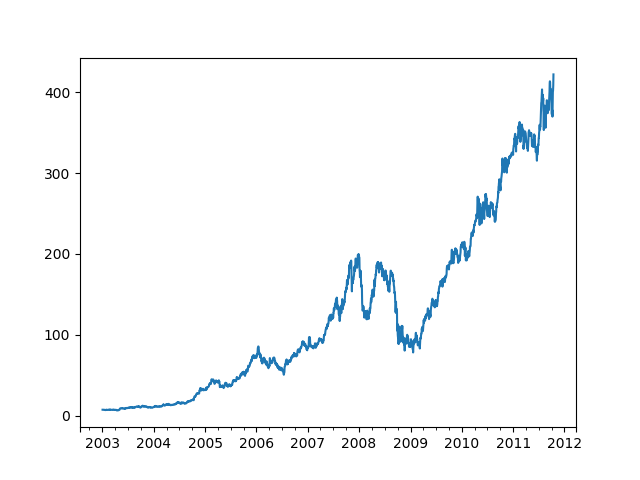

In [145]:
close_px.AAPL.plot()


In [142]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()

In [143]:
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


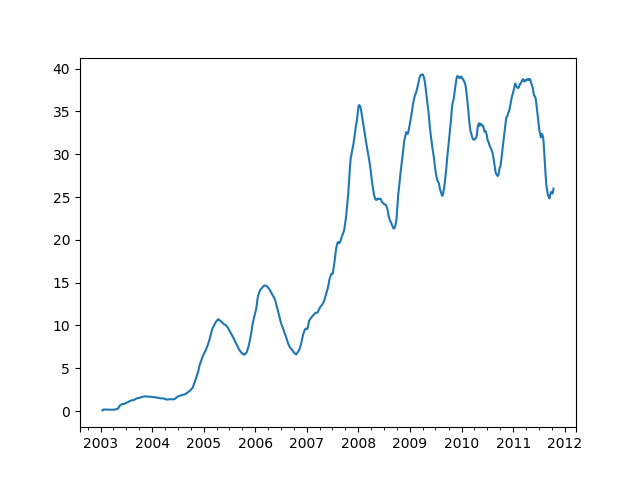

In [146]:
appl_std250.plot()

In [147]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


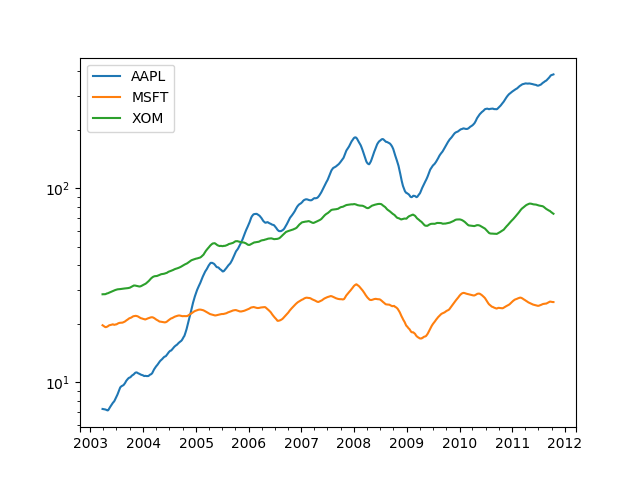

In [148]:
close_px.rolling(60).mean().plot(logy=True)

In [149]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


- 指数加权函数

- 二元移动窗口函数

# 第12章 高阶pandas

## 分类数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
values = pd.Series(['apple','orange','apple','apple']*2)

In [3]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [4]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [5]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [6]:
values = pd.Series([0,1,0,0]*2)

In [7]:
dim = pd.Series(['apple','orange'])

In [8]:
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [9]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

- pandas中的Categorical类型

In [10]:
fruits = ['apple','orange','apple','apple']*2

In [11]:
N = len(fruits)

In [13]:
df = pd.DataFrame({'fruit':fruits,
                  'basket_id':np.arange(N),
                  'count':np.random.randint(3,15,size=N),
                  'weight':np.random.uniform(0,4,size=N)},
                  columns=['basket_id','fruit','count','weight'])

In [14]:
df

,basket_id,fruit,count,weight
0,0,apple,12,0.132259
1,1,orange,11,3.900133
2,2,apple,13,2.863578
3,3,apple,5,0.877861
4,4,apple,10,3.830429
5,5,orange,5,1.080759
6,6,apple,6,0.491930
7,7,apple,10,3.477169


In [15]:
fruit_cat = df['fruit'].astype('category')

In [16]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [17]:
c  = fruit_cat.values

In [18]:
type(c)

pandas.core.arrays.categorical.Categorical

In [19]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [20]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [21]:
df['fruit']= df['fruit'].astype('category')

In [22]:
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [23]:
my_categories = pd.Categorical(['foo','bar','baz','foo','bar'])

In [24]:
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [25]:
categories = ['foo','bar','baz']

In [26]:
codes = [0,1,2,0,0,1]

In [27]:
my_cats_2 = pd.Categorical.from_codes(codes,categories)

In [28]:
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [29]:
ordered_cat = pd.Categorical.from_codes(codes,categories,ordered=True)

In [30]:
ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [31]:
my_cats_2.as_ordered

<bound method Categorical.as_ordered of [foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]>

- 使用Categorical对象进行计算

In [33]:
np.random.seed(12345)

In [34]:
draws = np.random.randn(1000)

In [36]:
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [37]:
bins = pd.qcut(draws,4)

In [38]:
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [39]:
bins = pd.qcut(draws,4,labels = ['Q1','Q2','Q3','Q4'])

In [40]:
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [41]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [42]:
bins = pd.Series(bins,name='quartile')

In [44]:
results =(pd.Series(draws)
         .groupby(bins)
         .agg(['count','min','max'])
         .reset_index())

In [45]:
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [46]:
# 使用分类获得更高的性能
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo','bar','baz','qux']*(N//4))

In [48]:
categories = labels.astype('category')

In [49]:
labels.memory_usage()

80000080

In [50]:
categories.memory_usage()

10000272

In [51]:
%time _= labels.astype('category')

Wall time: 857 ms


- 分类方法

In [52]:
s =  pd.Series(['a','b','c','d']*2)

In [53]:
cat_s = s.astype('category')

In [54]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [55]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [56]:
actual_categories = ['a','b','c','d','e']

In [57]:
cat_s2 =cat_s.cat.set_categories(actual_categories)

In [58]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

In [59]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [61]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In [62]:
cat_s3 = cat_s[cat_s.isin(['a','b'])]

In [63]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [64]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

## 高阶GroupBy应用

- 分组转换和“展开”GroupBy

In [65]:
df = pd.DataFrame({'key':['a','b','c']*4,
                  'value':np.arange(12.)})

In [66]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [67]:
g = df.groupby('key').value

In [69]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [70]:
g.transform(lambda x:x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [71]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [72]:
g.transform(lambda x:x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [73]:
g.transform(lambda x:x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [74]:
def normalize(x):
    return (x-x.mean())/x.std()

In [75]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [76]:
normalized = (df['value']-g.transform('mean'))/g.transform('std')

In [77]:
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

- 分组的时间重新采样

In [78]:
N=15

In [79]:
times = pd.date_range('2017-05-20 00:00',freq='1min',periods=N)

In [80]:
df = pd.DataFrame({'time':times,
                  'value':np.arange(N)})

In [81]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [82]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [84]:
df2 = pd.DataFrame({'time':times.repeat(3),
                   'key':np.tile(['a','b','c'],N),
                   'value':np.arange(N*3.)})

In [86]:
df2

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


In [90]:
time_key = pd.TimeGrouper('5min')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [93]:
time_key

TimeGrouper(freq=<5 * Minutes>, axis=0, sort=True, closed='left', label='left', how='mean', convention='e', base=0)

In [91]:
resampled = (df2.set_index('time').groupby(['key',time_key]).sum())

In [92]:
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

## 方法链技术

- pipe方法